# Topic Analysis on stock Market Prediction


## Import libraries

In [1]:
#Import libraries
import numpy as np
import pandas as pd 
import nltk
import seaborn as sns
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.stem.lancaster import LancasterStemmer
from sklearn.cluster import KMeans
from feature_engine import transformation as vt
from nltk.tokenize import WordPunctTokenizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
import datetime
from statsmodels.tsa.arima.model import ARIMA
import datetime
from sklearn.metrics import mean_squared_error
import math
from matplotlib.pyplot import figure
import scipy

## Data preprocessing and Transformation of the News data set

In [2]:
#Load news dataset
df_origin=pd.read_csv('Reddit_news_2.csv') #Text data
df_origin

,created_utc,id,num_comments,num_crossposts,score,selftext,title,created,date
0,1504320498,6xjcuf,24,0,30,NaN,"Leaving California's strawberry market, Dole F...",1.504335e+09,2017-09-02 02:48:18+00:00
1,1504274458,6xepe9,15,0,112,NaN,Goldman Buys $2.8 Billion Worth of Venezuelan ...,1.504289e+09,2017-09-01 14:00:58+00:00
2,1504271542,6xefb7,3,0,31,NaN,How to Make 8 Million Miserable Commuters Much...,1.504286e+09,2017-09-01 13:12:22+00:00
3,1504239272,6xc7t2,2,0,20,NaN,"Mexico, Canada to stay in NAFTA even if U.S. l...",1.504254e+09,2017-09-01 04:14:32+00:00
4,1504274076,6xeo2e,1,0,45,NaN,The Myth of American Universities as Inequalit...,1.504288e+09,2017-09-01 13:54:36+00:00
...,...,...,...,...,...,...,...,...,...
68800,1661991917,x2t8ur,0,0,1,Can someone explain to me how USD hit a mark m...,Question,1.662006e+09,2022-09-01 00:25:17+00:00
68801,1661997842,x2vbt7,0,0,1,NaN,U.S. Officials Halt Nvidia AI Chip Sales to China,1.662012e+09,2022-09-01 02:04:02+00:00
68802,1661995687,x2ukm6,0,0,1,NaN,Bank of America announces zero down payment mo...,1.662010e+09,2022-09-01 01:28:07+00:00
68803,1661944240,x2atd0,0,0,1,NaN,A Poorer Generation: Americans under 40 have h...,1.661959e+09,2022-08-31 11:10:40+00:00


In [3]:
#Keep only necessary information
df=df_origin[['id', 'title', 'date']]

In [4]:
df

,id,title,date
0,6xjcuf,"Leaving California's strawberry market, Dole F...",2017-09-02 02:48:18+00:00
1,6xepe9,Goldman Buys $2.8 Billion Worth of Venezuelan ...,2017-09-01 14:00:58+00:00
2,6xefb7,How to Make 8 Million Miserable Commuters Much...,2017-09-01 13:12:22+00:00
3,6xc7t2,"Mexico, Canada to stay in NAFTA even if U.S. l...",2017-09-01 04:14:32+00:00
4,6xeo2e,The Myth of American Universities as Inequalit...,2017-09-01 13:54:36+00:00
...,...,...,...
68800,x2t8ur,Question,2022-09-01 00:25:17+00:00
68801,x2vbt7,U.S. Officials Halt Nvidia AI Chip Sales to China,2022-09-01 02:04:02+00:00
68802,x2ukm6,Bank of America announces zero down payment mo...,2022-09-01 01:28:07+00:00
68803,x2atd0,A Poorer Generation: Americans under 40 have h...,2022-08-31 11:10:40+00:00


In [5]:
#Reome missing values
df=df.dropna()
df

,id,title,date
0,6xjcuf,"Leaving California's strawberry market, Dole F...",2017-09-02 02:48:18+00:00
1,6xepe9,Goldman Buys $2.8 Billion Worth of Venezuelan ...,2017-09-01 14:00:58+00:00
2,6xefb7,How to Make 8 Million Miserable Commuters Much...,2017-09-01 13:12:22+00:00
3,6xc7t2,"Mexico, Canada to stay in NAFTA even if U.S. l...",2017-09-01 04:14:32+00:00
4,6xeo2e,The Myth of American Universities as Inequalit...,2017-09-01 13:54:36+00:00
...,...,...,...
68800,x2t8ur,Question,2022-09-01 00:25:17+00:00
68801,x2vbt7,U.S. Officials Halt Nvidia AI Chip Sales to China,2022-09-01 02:04:02+00:00
68802,x2ukm6,Bank of America announces zero down payment mo...,2022-09-01 01:28:07+00:00
68803,x2atd0,A Poorer Generation: Americans under 40 have h...,2022-08-31 11:10:40+00:00


In [6]:
X=df.drop(['id', 'date'],axis=1)

In [7]:
messages=X.copy()
messages.reset_index(inplace=True)

In [8]:
#Data cleaning and processing
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import nltk

corpus2 = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i]) #Remove Special Characters
    review = ''.join(review)
    corpus2.append(review)

df['title_2']=corpus2
df['title_2'] = df['title_2'].astype(str).str.lower()
df['title_lemma']=corpus2

#Word Lemmatization
lemma = nltk.wordnet.WordNetLemmatizer()
for i in range(0, len(df)):
    df['title_lemma'][i] = lemma.lemmatize(df['title_2'][i])

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

#Word Tokenization
regexp = RegexpTokenizer('\w+')
df['title_3']=df['title_lemma'].apply(regexp.tokenize)
stopwords = nltk.corpus.stopwords.words("english") #Remove stopwords
my_stopwords = ['news','say','said','says','think','thought','like','make','made','result']
stopwords.extend(my_stopwords)
df['title_4'] = df['title_3'].apply(lambda x:[word for word in x if word not in stopwords])

#Word stemming
ps = PorterStemmer()
df['stemmed'] = df['title_4'].apply(lambda x: [ps.stem(y) for y in x])

In [10]:
print(df['title'][:20])
print(df['stemmed'][:20])

0     Leaving California's strawberry market, Dole F...
1     Goldman Buys $2.8 Billion Worth of Venezuelan ...
2     How to Make 8 Million Miserable Commuters Much...
3     Mexico, Canada to stay in NAFTA even if U.S. l...
4     The Myth of American Universities as Inequalit...
5     Japan Inc turns contract workers into permanen...
6     America's Superstar Companies Are a Drag on Gr...
7     Bruegel: Should the EU have the power to vet f...
8     Manager of the world’s largest investment fund...
9     Blockchain: How It Could Bolster Emerging Markets
10      Monopoly Rents and Corporate Taxation (Wonkish)
11    Has Global Trade Fueled US Wage Inequality? A ...
12    Younger, Cheaper, Smaller, Smarter: Meet the N...
13    Bay Banks of Virginia, Inc. Completes $35 Mill...
14                  Modi's Biggest Move Is a Total Bust
15    Best stock tips -Stocks today- Pharma stocks l...
16                    India's growth rate slows to 5.7%
17    Get Ready To $MAGA With New Pro-Trump, Pro

In [11]:
#Split training and testing sets
minda = min(df['date'])
maxda = max(df['date'])
mindat = minda[0:10]
maxdat = maxda[0:10]

from datetime import datetime
from dateutil.relativedelta import relativedelta
x = datetime.strptime(mindat, '%Y-%m-%d')
y = datetime.strptime(maxdat, '%Y-%m-%d')
if __name__ == "__main__":
    flag = str(y - relativedelta(months=+3))
print(y)
print(flag)

2022-09-01 00:00:00
2022-06-01 00:00:00


In [12]:
train = pd.DataFrame(df[df.date < flag])
test = pd.DataFrame(df[df.date > flag])

train0 = train.drop(['date'], axis=1)
test0 = test.drop(['date'], axis=1)

In [13]:
#Remove infrequent and meaningless words
train0['stemmed_string'] = train0['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
test0['stemmed_string'] = test0['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

all_words_train = ' '.join([word for word in train0['stemmed_string']])
all_words_test = ' '.join([word for word in test0['stemmed_string']])

In [14]:
train0

,id,title,title_2,title_lemma,title_3,title_4,stemmed,stemmed_string
0,6xjcuf,"Leaving California's strawberry market, Dole F...",leaving california s strawberry market dole f...,leaving california s strawberry market dole f...,"[leaving, california, s, strawberry, market, d...","[leaving, california, strawberry, market, dole...","[leav, california, strawberri, market, dole, f...",leav california strawberri market dole food la...
1,6xepe9,Goldman Buys $2.8 Billion Worth of Venezuelan ...,goldman buys billion worth of venezuelan ...,goldman buys billion worth of venezuelan ...,"[goldman, buys, billion, worth, of, venezuelan...","[goldman, buys, billion, worth, venezuelan, bo...","[goldman, buy, billion, worth, venezuelan, bon...",goldman buy billion worth venezuelan bond upro...
2,6xefb7,How to Make 8 Million Miserable Commuters Much...,how to make million miserable commuters much...,how to make million miserable commuters much...,"[how, to, make, million, miserable, commuters,...","[million, miserable, commuters, much, happier,...","[million, miser, commut, much, happier, billio...",million miser commut much happier billion proj...
3,6xc7t2,"Mexico, Canada to stay in NAFTA even if U.S. l...",mexico canada to stay in nafta even if u s l...,mexico canada to stay in nafta even if u s l...,"[mexico, canada, to, stay, in, nafta, even, if...","[mexico, canada, stay, nafta, even, u, leaves,...","[mexico, canada, stay, nafta, even, u, leav, m...",mexico canada stay nafta even leav minist
4,6xeo2e,The Myth of American Universities as Inequalit...,the myth of american universities as inequalit...,the myth of american universities as inequalit...,"[the, myth, of, american, universities, as, in...","[myth, american, universities, inequality, fig...","[myth, american, univers, inequ, fighter, coll...",myth american univers inequ fighter colleg nea...
...,...,...,...,...,...,...,...,...
64202,v1piw4,Should corporations built their own company to...,should corporations built their own company to...,should corporations built their own company to...,"[should, corporations, built, their, own, comp...","[corporations, built, company, towns, attract,...","[corpor, built, compani, town, attract, retain...",corpor built compani town attract retain labor
64204,v1s0xj,Ethereum’s merge could help save DeFi,ethereum s merge could help save defi,ethereum s merge could help save defi,"[ethereum, s, merge, could, help, save, defi]","[ethereum, merge, could, help, save, defi]","[ethereum, merg, could, help, save, defi]",ethereum merg could help save defi
64205,v1r4zu,US Cities That Lost the Most Residents In 2021...,us cities that lost the most residents in ...,us cities that lost the most residents in ...,"[us, cities, that, lost, the, most, residents,...","[us, cities, lost, residents, page]","[us, citi, lost, resid, page]",citi lost resid page
64206,v1smva,They Say “It’s Not Possible”,they say it s not possible,they say it s not possible,"[they, say, it, s, not, possible]",[possible],[possibl],possibl


In [15]:
#Count each word's occurance number
from nltk.probability import FreqDist

all_token_train = nltk.tokenize.word_tokenize(all_words_train)
all_token_test = nltk.tokenize.word_tokenize(all_words_test)
fdist = FreqDist(all_token_train)
fdist

FreqDist({'economi': 4475, 'china': 3806, 'market': 3768, 'stock': 3202, 'econom': 3122, 'year': 2760, 'new': 2750, 'trade': 2539, 'bank': 2329, 'price': 2276, ...})

In [16]:
#Tokenization and Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer1 = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words='english') 
vectorizer2 = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words='english')

comment_train = vectorizer1.fit_transform(train0['stemmed_string']).todense()
comment_test = vectorizer2.fit_transform(test0['stemmed_string']).todense()
vocab1 = np.array(vectorizer1.get_feature_names())
vocab2 = np.array(vectorizer2.get_feature_names())

In [17]:
df_vector_train = pd.DataFrame(comment_train, columns= vocab1)
df_vector_test = pd.DataFrame(comment_test, columns= vocab2)
df_vector_train = pd.DataFrame(df_vector_train, columns= df_vector_test.columns)
df_vector_train = df_vector_train.dropna(how='all', axis = 1)
df_vector_test = pd.DataFrame(df_vector_test, columns= df_vector_train.columns)
df_vector_test = df_vector_test.dropna(how='all', axis = 1)

In [18]:
df_vector_train

,aapl,abandon,abbott,abduct,abenom,abid,abl,abo,abort,abroad,...,zendesk,zer,zero,zerohedg,zimbabw,zinc,zoltan,zombi,zone,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling and Evaluation to predict stock prices

In [19]:
#Create and train KMeans model and use MSE to evaluate the model's performance
MSE = []
I = range(1,20,1)
MYSEED = 1001
for i in I:
    model = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=1,random_state=MYSEED)
    model.fit(df_vector_train)
    MSE.append(model.inertia_/len(df_vector_train))

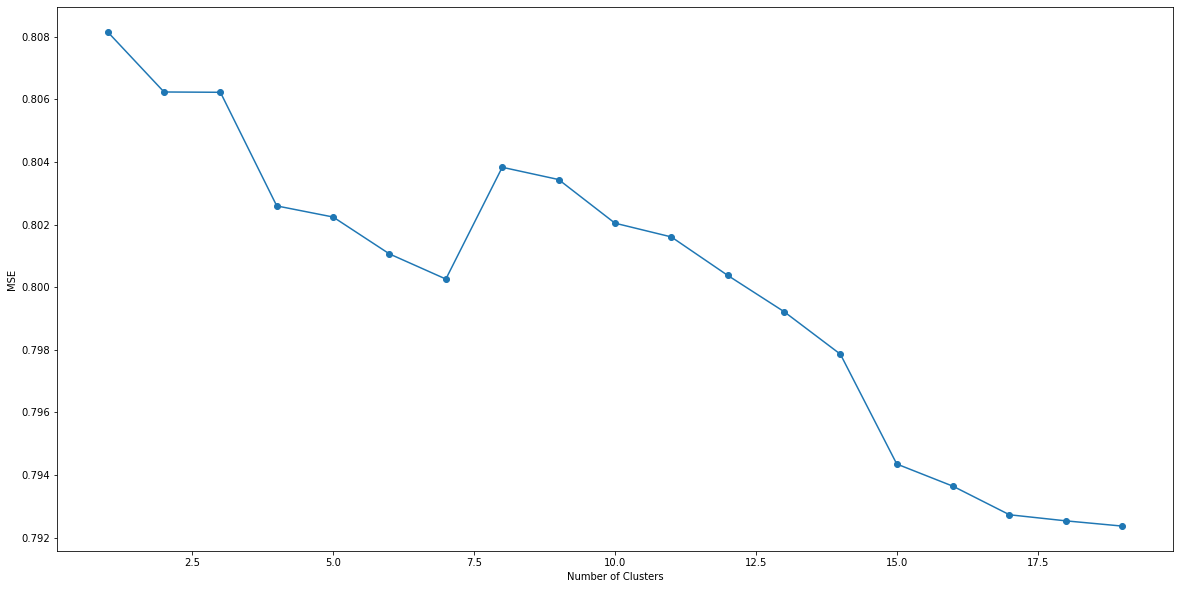

In [20]:
#Visualize the model's performance by plotting MSE trending with different number of clusters
plt.figure(figsize=(20,10))
plt.plot(I, MSE,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("MSE")
plt.show()

In [21]:
true_k = 17
MYSEED = 1001
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,random_state=MYSEED)
model.fit(df_vector_train)

KMeans(max_iter=100, n_clusters=17, n_init=1, random_state=1001)

In [22]:
#Print top terms per cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = df_vector_train.columns
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 recess
 economi
 great
 global
 come
 fear
 sinc
 econom
 economist
 year
Cluster 1:
 desir
 distanc
 stick
 experienc
 unpreced
 connect
 uncertainti
 amid
 becom
 chang
Cluster 2:
 brexit
 deal
 trade
 pound
 britain
 post
 bank
 economi
 british
 england
Cluster 3:
 claim
 jobless
 unemploy
 weekli
 low
 week
 million
 file
 expect
 new
Cluster 4:
 deceiv
 listen
 slaveri
 stand
 manipul
 children
 univers
 control
 digit
 currenc
Cluster 5:
 church
 christian
 england
 ministri
 busi
 fund
 state
 unit
 cathol
 tax
Cluster 6:
 watch
 thing
 week
 stock
 market
 financi
 economi
 video
 trend
 econom
Cluster 7:
 economi
 china
 econom
 trade
 year
 new
 market
 price
 trump
 bank
Cluster 8:
 afford
 hous
 american
 home
 wage
 citi
 minimum
 rent
 worker
 expens
Cluster 9:
 pay
 tax
 worker
 million
 job
 debt
 american
 compani
 year
 work
Cluster 10:
 hire
 job
 worker
 compani
 new
 amazon
 labor
 unemploy
 slow
 pay
Cluster 11:
 incom
 basic
 u

In [23]:
#Use model to produce predictions on testing and training dataset
prediction_test = model.predict(df_vector_test)
prediction_train = model.predict(df_vector_train)

In [24]:
df_result_train = pd.DataFrame(df[df.date < flag])
df_result_train['result'] = prediction_train
df_result_test = pd.DataFrame(df[df.date > flag])
df_result_test['result'] = prediction_test

In [25]:
X = df_vector_test
y = df_result_test['result']
X_train = df_vector_train
y_train = df_result_train['result']

In [26]:
#Perform features reduction based on chi-squared
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 1000 features with highest chi-squared statistics are selected
chi2_selector = SelectKBest(chi2, k=1000)
X_kbest = chi2_selector.fit_transform(X_train, y_train)
print(X_kbest)

print('Original number of features:', X_train.shape)
print('Reduced number of features:', X_kbest.shape)
reduced_columns = chi2_selector.get_feature_names_out(df_vector_train.columns)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Original number of features: (64206, 4931)
Reduced number of features: (64206, 1000)


In [27]:
chi2_selector.get_feature_names_out(df_vector_train.columns)

array(['aapl', 'abandon', 'abus', 'accept', 'acknowledg', 'act', 'adjust',
       'advisori', 'advoc', 'afdb', 'afford', 'agenc', 'agre',
       'agreement', 'agricol', 'ahead', 'airport', 'akon', 'alarm',
       'alert', 'alibaba', 'almighti', 'alright', 'amazon', 'ambul',
       'amc', 'america', 'american', 'amid', 'analysi', 'analyst',
       'andrew', 'angel', 'annihil', 'anoth', 'anticip', 'anymor',
       'anywher', 'apart', 'aplenti', 'appl', 'applic', 'apr', 'arbitrag',
       'area', 'argentina', 'argument', 'aris', 'armageddon', 'asia',
       'asian', 'asset', 'assum', 'attach', 'attent', 'aussi',
       'australia', 'australian', 'avail', 'averag', 'avoid', 'away',
       'baba', 'background', 'bad', 'bank', 'basic', 'basket', 'bbc',
       'becom', 'beginn', 'ben', 'benefit', 'berni', 'besid', 'best',
       'bet', 'bibl', 'big', 'billion', 'billionair', 'biotech',
       'bitcoin', 'blackout', 'bleak', 'blind', 'blockchain', 'blown',
       'blueprint', 'bnpl', 'bond', '

In [28]:
df_reducedvector_train = pd.DataFrame(X_train, columns= reduced_columns)
df_reducedvector_train

,aapl,abandon,abus,accept,acknowledg,act,adjust,advisori,advoc,afdb,...,yale,year,yen,yield,younger,youtub,yuan,zandi,zeihan,zimbabw
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#Use datasets after features reduction to build and train another KMeans model
MSE2 = []
I = range(1,20,1)
MYSEED = 2002
for i in I:
    model2 = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=1,random_state=MYSEED)
    model2.fit(df_reducedvector_train)
    MSE2.append(model2.inertia_/len(df_reducedvector_train))

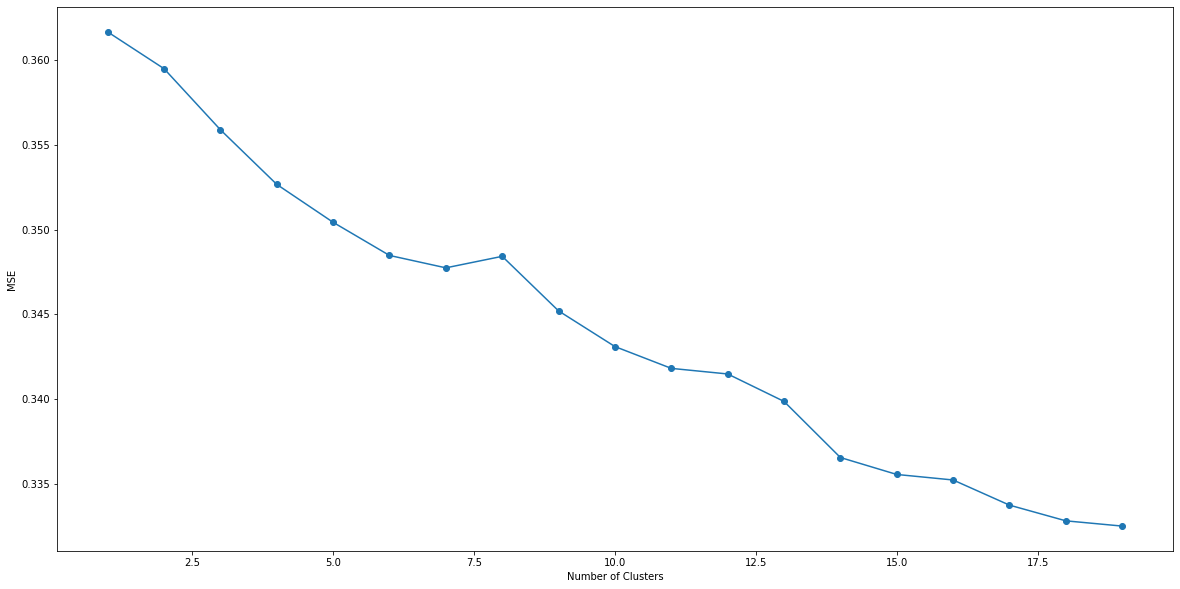

In [30]:
#Visalize model's performance by plotting MSE trending line
plt.figure(figsize=(20,10))
plt.plot(I, MSE2,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("MSE")
plt.show()

In [31]:
true_k = 14
MYSEED = 2002
model2 = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,random_state=MYSEED)
model2.fit(df_reducedvector_train)

KMeans(max_iter=100, n_clusters=14, n_init=1, random_state=2002)

In [32]:
#Print top terms per cluster
print("Top terms per cluster:")
order_centroids = model2.cluster_centers_.argsort()[:, ::-1]
terms = df_reducedvector_train.columns
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 rate
 fed
 unemploy
 cut
 rais
 mortgag
 low
 year
 bank
 rise
Cluster 1:
 inflat
 price
 year
 rise
 fed
 high
 rate
 economi
 hit
 higher
Cluster 2:
 stock
 buy
 trade
 best
 tip
 investor
 invest
 week
 rise
 exchang
Cluster 3:
 worker
 wage
 pay
 job
 employ
 amazon
 million
 minimum
 unemploy
 shortag
Cluster 4:
 tesla
 stock
 share
 china
 bitcoin
 billion
 report
 buy
 sell
 electr
Cluster 5:
 thing
 watch
 market
 week
 financi
 economi
 need
 econom
 bad
 trade
Cluster 6:
 appl
 stock
 googl
 china
 store
 billion
 amazon
 compani
 new
 share
Cluster 7:
 price
 oil
 rise
 high
 home
 year
 fall
 gold
 hous
 surg
Cluster 8:
 summari
 daili
 christoph
 covid
 europ
 unit
 state
 novemb
 septemb
 march
Cluster 9:
 tax
 cut
 corpor
 pay
 incom
 rich
 wealth
 american
 billionair
 new
Cluster 10:
 trillion
 debt
 dollar
 economi
 year
 world
 china
 record
 nation
 market
Cluster 11:
 china
 econom
 trade
 bank
 new
 year
 world
 job
 billion
 bit

In [33]:
#Save prediction results into one dataframe
df_reducedvector_test = pd.DataFrame(df_vector_test, columns= reduced_columns)
prediction2_train = model2.predict(df_reducedvector_train)
prediction2_test = model2.predict(df_reducedvector_test)
df_result_train['reducedresult'] = prediction2_train
df_result_test['reducedresult'] = prediction2_test

## Data Transformation for the result of the topic modeling

In [34]:
# storing necesarry information to result data frames
df_origin_train = pd.DataFrame(df_origin[df_origin.date < flag])
df_origin_test = pd.DataFrame(df_origin[df_origin.date > flag])
df_result_train['comments']= df_origin_train['num_comments']
df_result_train['score']= df_origin_train['score']
df_result_train['count']= 1
df_result_train['date'] = df_origin_train['date'].str[:10]
df_result_test['comments']= df_origin_test['num_comments']
df_result_test['score']= df_origin_test['score']
df_result_test['count']= 1
df_result_test['date'] = df_origin_test['date'].str[:10]

In [35]:
# aggregating number of comments, score, and count for each day and each topic
df_aggregated_train = df_result_train.groupby(['date','reducedresult'], as_index=False).agg({"comments": "sum"})
df_aggregated_test = df_result_test.groupby(['date','reducedresult'], as_index=False).agg({"comments": "sum"})
df_aggregated_train['score'] = df_result_train.groupby(['date','reducedresult'], as_index=False).agg({"score": "sum"})['score']
df_aggregated_test['score'] = df_result_test.groupby(['date','reducedresult'], as_index=False).agg({"score": "sum"})['score']
df_aggregated_train['count'] = df_result_train.groupby(['date','reducedresult'], as_index=False).agg({"count": "sum"})['count']
df_aggregated_test['count'] = df_result_test.groupby(['date','reducedresult'], as_index=False).agg({"count": "sum"})['count']
df_aggregated_train['reducedresult'] = df_aggregated_train['reducedresult'].apply(str)
df_aggregated_test['reducedresult'] = df_aggregated_test['reducedresult'].apply(str)

In [36]:
# show aggregated data
df_aggregated_train

,date,reducedresult,comments,score,count
0,2017-09-01,0,0,9,3
1,2017-09-01,1,0,3,2
2,2017-09-01,2,0,1,1
3,2017-09-01,3,1,2,1
4,2017-09-01,7,0,1,1
...,...,...,...,...,...
11392,2022-05-31,9,0,1,1
11393,2022-05-31,10,0,1,1
11394,2022-05-31,11,0,46,47
11395,2022-05-31,12,0,1,1


In [37]:
# save results
df_aggregated_train.to_csv('ClusteringResult_train.csv', sep=',', header=True, index=False)
df_aggregated_test.to_csv('ClusteringResult_test.csv', sep=',', header=True, index=False)

In [38]:
# load results
df_aggregated_train = pd.read_csv('ClusteringResult_train.csv', delimiter=',', header=0)
df_aggregated_test = pd.read_csv('ClusteringResult_test.csv', delimiter=',', header=0)

# change data type of clustering results
df_aggregated_train['reducedresult'] = df_aggregated_train['reducedresult'].apply(str)
df_aggregated_test['reducedresult'] = df_aggregated_test['reducedresult'].apply(str)

In [39]:
# Transform the number of comments, scores, and posts on each topic to be attributes 
df_output_train = df_aggregated_train.pivot(index='date',columns='reducedresult', values=['comments','score','count'])
df_output_train = df_output_train.fillna(0)
df_output_train.columns = ["_".join((j,k)) for j,k in df_output_train.columns]
df_output_test = df_aggregated_test.pivot(index='date',columns='reducedresult', values=['comments','score','count'])
df_output_test = df_output_test.fillna(0)
df_output_test.columns = ["_".join((j,k)) for j,k in df_output_test.columns]
df_output_train = df_output_train.loc[:, (df_output_train != df_output_train.iloc[0]).any()] 
df_output_test = df_output_test.loc[:, (df_output_test != df_output_test.iloc[0]).any()] 
df_output_train = pd.DataFrame(df_output_train, columns= df_output_test.columns)
df_output_test = pd.DataFrame(df_output_test, columns= df_output_train.columns)

In [40]:
# Show transformed data
df_output_train[20:]

,comments_0,comments_1,comments_11,comments_13,comments_3,comments_7,score_0,score_1,score_10,score_11,...,count_11,count_12,count_13,count_2,count_3,count_4,count_5,count_6,count_7,count_9
date,,,,,,,,,,,,,,,,,,,,,
2017-09-21,6.0,0.0,57.0,0.0,0.0,0.0,6.0,3.0,7.0,297.0,...,27.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0
2017-09-22,1.0,0.0,24.0,11.0,0.0,0.0,0.0,0.0,57.0,93.0,...,25.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0
2017-09-23,8.0,0.0,34.0,0.0,0.0,0.0,34.0,0.0,0.0,232.0,...,17.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-24,1.0,1.0,55.0,7.0,0.0,0.0,2.0,1.0,0.0,265.0,...,22.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-25,0.0,0.0,31.0,0.0,0.0,0.0,2.0,0.0,0.0,147.0,...,24.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,43.0,...,43.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
2022-05-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,41.0,...,41.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
2022-05-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,...,48.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


array([[<AxesSubplot:title={'center':'comments_0'}>,
        <AxesSubplot:title={'center':'comments_1'}>,
        <AxesSubplot:title={'center':'comments_11'}>,
        <AxesSubplot:title={'center':'comments_13'}>,
        <AxesSubplot:title={'center':'comments_3'}>,
        <AxesSubplot:title={'center':'comments_7'}>],
       [<AxesSubplot:title={'center':'score_0'}>,
        <AxesSubplot:title={'center':'score_1'}>,
        <AxesSubplot:title={'center':'score_10'}>,
        <AxesSubplot:title={'center':'score_11'}>,
        <AxesSubplot:title={'center':'score_12'}>,
        <AxesSubplot:title={'center':'score_13'}>],
       [<AxesSubplot:title={'center':'score_2'}>,
        <AxesSubplot:title={'center':'score_3'}>,
        <AxesSubplot:title={'center':'score_4'}>,
        <AxesSubplot:title={'center':'score_5'}>,
        <AxesSubplot:title={'center':'score_6'}>,
        <AxesSubplot:title={'center':'score_7'}>],
       [<AxesSubplot:title={'center':'score_9'}>,
        <AxesSubplot:ti

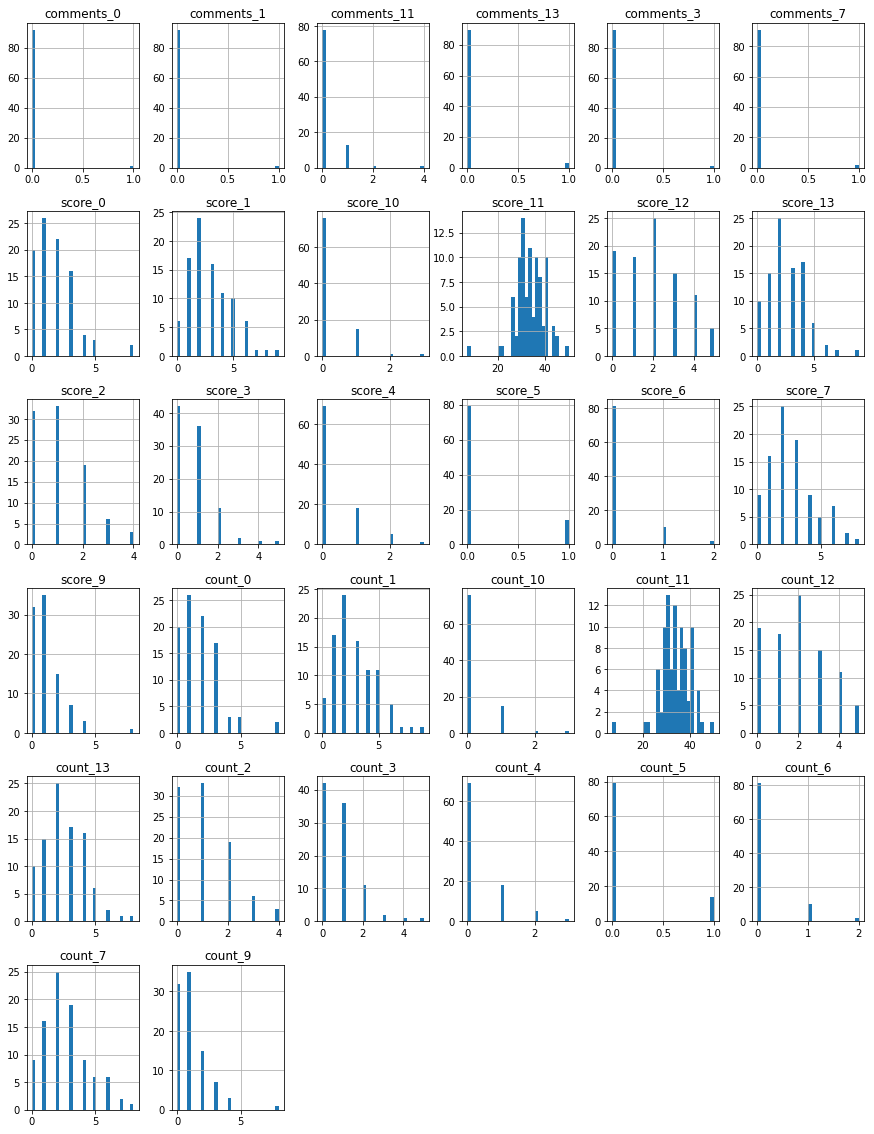

In [41]:
# Show distribution of attributes
fig = plt.figure(figsize = (15,20))
ax = fig.gca()

df_output_test.hist(ax = ax,bins = 30)

In [42]:
# Apply BoxCox transformation
df_transformed_train = df_output_train
df_transformed_train = df_transformed_train.add(0.0001)
df_transformed_test = df_output_test
df_transformed_test = df_transformed_test.add(0.0001)
tf = vt.BoxCoxTransformer()
tf.fit(df_transformed_train)
df_transformed_train = tf.transform(df_transformed_train)
df_transformed_test = tf.transform(df_transformed_test)


In [43]:
# Remove outliers by IQR
for col in df_transformed_train.columns:
    Q1 = df_transformed_train[col].quantile(0.25)
    Q3 = df_transformed_train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_b = Q3 + 1.5*IQR
    lower_b = Q1 - 1.5*IQR
    median = df_transformed_train[col].median(axis = 0)
    for i in range(0, len(df_transformed_train)):
        if df_transformed_train[col][i] > upper_b or df_transformed_train[col][i] < lower_b:
            df_transformed_train[col][i] = median

array([[<AxesSubplot:title={'center':'comments_0'}>,
        <AxesSubplot:title={'center':'comments_1'}>,
        <AxesSubplot:title={'center':'comments_11'}>,
        <AxesSubplot:title={'center':'comments_13'}>,
        <AxesSubplot:title={'center':'comments_3'}>,
        <AxesSubplot:title={'center':'comments_7'}>],
       [<AxesSubplot:title={'center':'score_0'}>,
        <AxesSubplot:title={'center':'score_1'}>,
        <AxesSubplot:title={'center':'score_10'}>,
        <AxesSubplot:title={'center':'score_11'}>,
        <AxesSubplot:title={'center':'score_12'}>,
        <AxesSubplot:title={'center':'score_13'}>],
       [<AxesSubplot:title={'center':'score_2'}>,
        <AxesSubplot:title={'center':'score_3'}>,
        <AxesSubplot:title={'center':'score_4'}>,
        <AxesSubplot:title={'center':'score_5'}>,
        <AxesSubplot:title={'center':'score_6'}>,
        <AxesSubplot:title={'center':'score_7'}>],
       [<AxesSubplot:title={'center':'score_9'}>,
        <AxesSubplot:ti

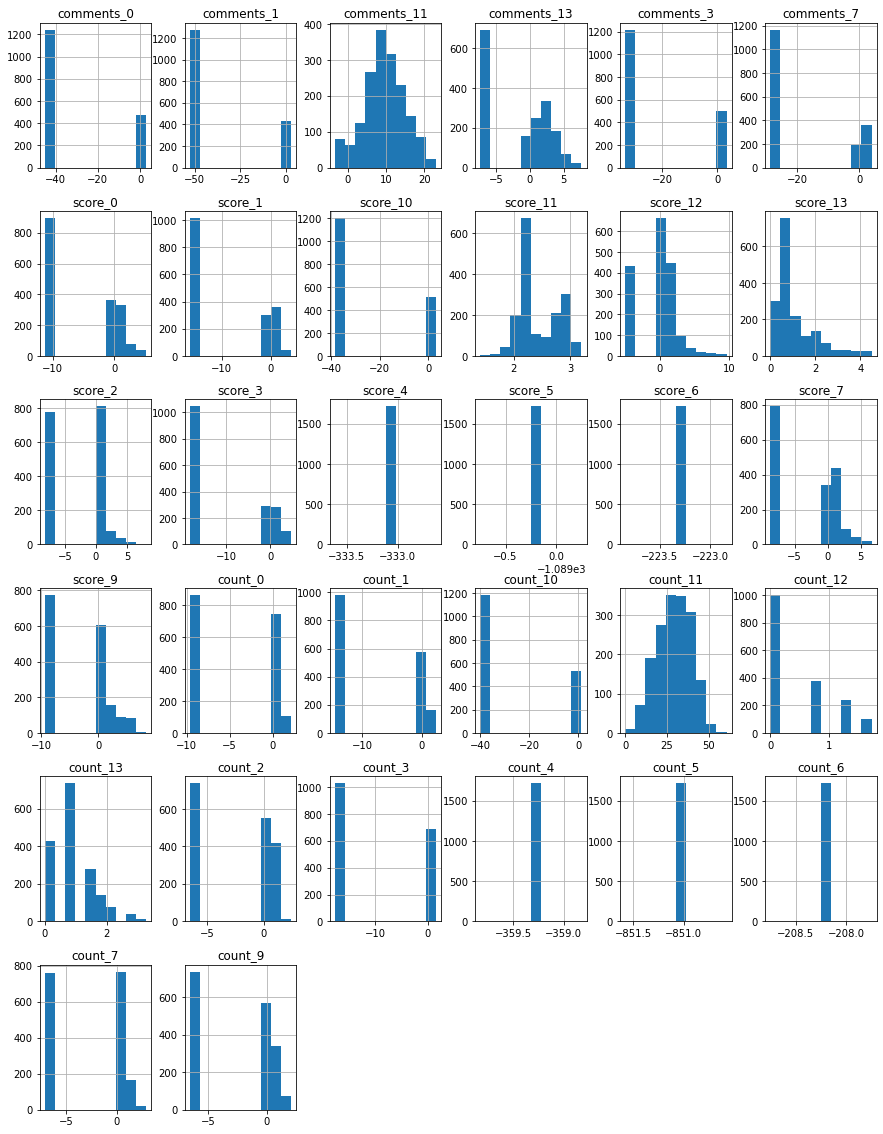

In [44]:
# Show the results of BoxCox transformation
fig = plt.figure(figsize = (15,20))
ax = fig.gca()

df_transformed_train.hist(ax = ax,bins = 10)

In [45]:
# Apply Min-Max scaler
df_transformed_train = df_transformed_train.loc[:, (df_transformed_train != df_transformed_train.iloc[0]).any()] 
df_transformed_test = pd.DataFrame(df_transformed_test, columns= df_transformed_train.columns)
scaler = MinMaxScaler()
scaler.fit(df_transformed_train)
np_input_train = scaler.transform(df_transformed_train)
np_input_test = scaler.transform(df_transformed_test)
df_input_train = df_transformed_train
counter = 0
for col in df_transformed_train.columns:
    df_input_train[col] = np_input_train[:,counter]
    counter = counter +1 

df_input_test = df_transformed_test
counter = 0
for col in df_transformed_test.columns:
    df_input_test[col] = np_input_test[:,counter]
    counter = counter +1 

array([[<AxesSubplot:title={'center':'comments_0'}>,
        <AxesSubplot:title={'center':'comments_1'}>,
        <AxesSubplot:title={'center':'comments_11'}>,
        <AxesSubplot:title={'center':'comments_13'}>,
        <AxesSubplot:title={'center':'comments_3'}>],
       [<AxesSubplot:title={'center':'comments_7'}>,
        <AxesSubplot:title={'center':'score_0'}>,
        <AxesSubplot:title={'center':'score_1'}>,
        <AxesSubplot:title={'center':'score_10'}>,
        <AxesSubplot:title={'center':'score_11'}>],
       [<AxesSubplot:title={'center':'score_12'}>,
        <AxesSubplot:title={'center':'score_13'}>,
        <AxesSubplot:title={'center':'score_2'}>,
        <AxesSubplot:title={'center':'score_3'}>,
        <AxesSubplot:title={'center':'score_7'}>],
       [<AxesSubplot:title={'center':'score_9'}>,
        <AxesSubplot:title={'center':'count_0'}>,
        <AxesSubplot:title={'center':'count_1'}>,
        <AxesSubplot:title={'center':'count_10'}>,
        <AxesSubplot:t

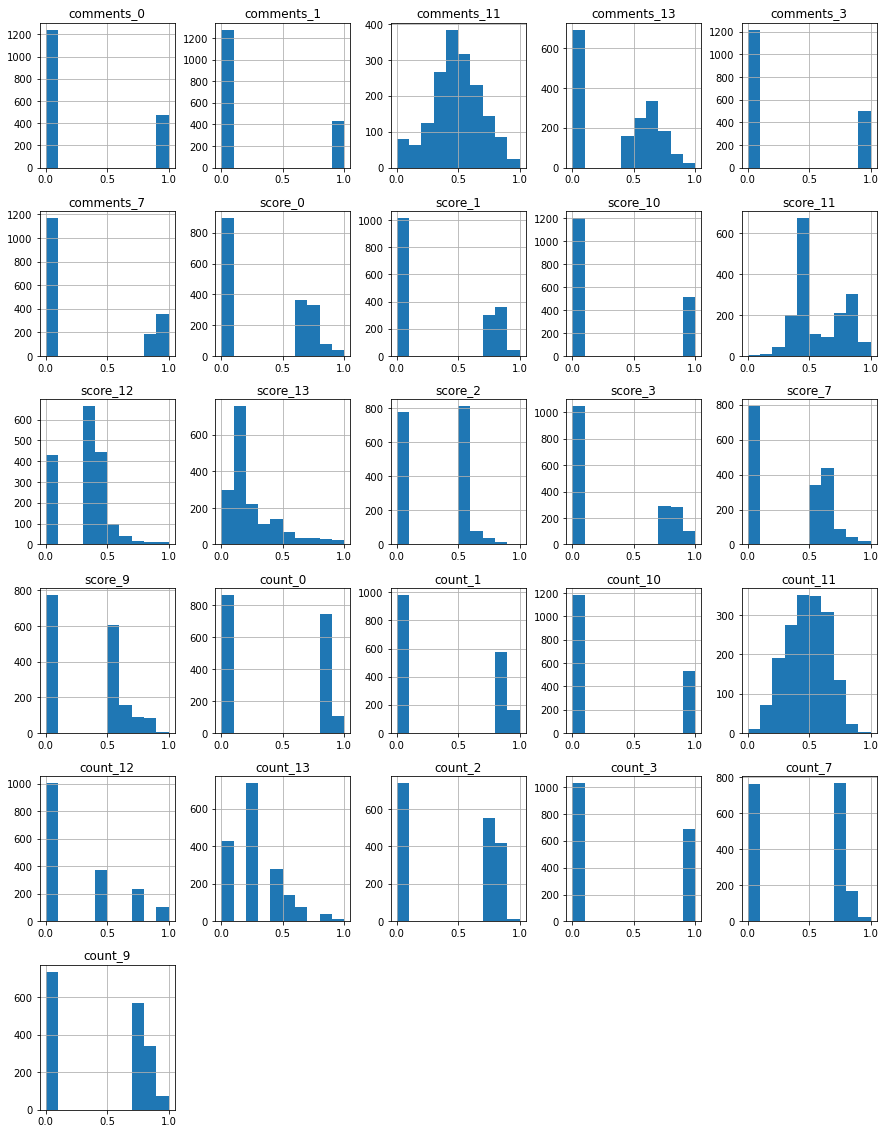

In [46]:
# Show results of transformation
fig = plt.figure(figsize = (15,20))
ax = fig.gca()

df_input_train.hist(ax = ax,bins = 10)

## Data transformation for the stock data

In [47]:
# Load data, change index into datetime, and rename columns
price_df = pd.read_csv('HistoricalPrices.csv', index_col = 'Date', parse_dates = True)
price_df.index = pd.to_datetime(price_df.index)
price_df = price_df.rename(columns={' Close': 'Close' })
price_df = price_df.sort_index(axis = 0)

In [48]:
from datetime import datetime
import datetime
# Combine the stock data and the result of topic modeling
df_input_train = df_input_train.set_index(pd.to_datetime(df_input_train.index) + datetime.timedelta(days=1))
df_input_test = df_input_test.set_index(pd.to_datetime(df_input_test.index) + datetime.timedelta(days=1))
price_df_train = price_df.join(df_input_train)
price_df_train = price_df_train.dropna()

# Make input data for ARIMA and ARIMAX models
exval_df_train = price_df_train.drop([' Open',' High',' Low','Close'],axis = 1)
endog_df_train = price_df_train['Close']
price_df_test = price_df.join(df_input_test)
price_df_test = price_df_test.dropna()
exval_df_test = price_df_test.drop([' Open',' High',' Low','Close'],axis = 1)
endog_df_test = price_df_test['Close']
endog_df_train = pd.DataFrame(price_df_train['Close'])
endog_df_test = pd.DataFrame(price_df_test['Close'])

ADF statistic: -1.54
P-value:0.52


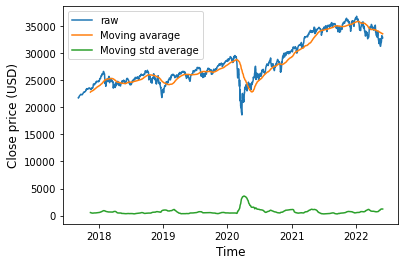

In [49]:
# Data exploration and stationerity check
ma = endog_df_train.Close.rolling(50).mean()
ma_std = endog_df_train.Close.rolling(50).std()
plt.plot(endog_df_train.Close, label= 'raw')
plt.plot(ma,label = 'Moving avarage')
plt.plot(ma_std, label = 'Moving std average')
plt.ylabel('Close price (USD)', fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.legend(loc='best')

test_result = adfuller(endog_df_train.Close,maxlag=9)
print('ADF statistic: ' + str("{:.2f}".format(test_result[0])) +'\n'
     'P-value:' + str("{:.2f}".format(test_result[1])))

In [50]:
# Computation of differences (d = 1)
endog_df_train_dif = endog_df_train
endog_df_train_dif['dif']= endog_df_train_dif.Close.diff().dropna()
endog_df_train = endog_df_train.drop('dif',axis = 1)

ADF statistic: -10.6133551096
P-value:0.0000000000


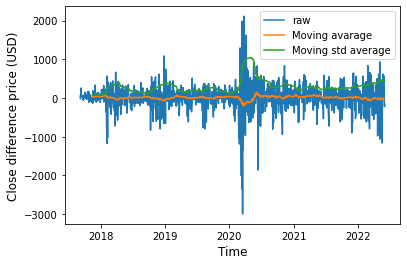

In [51]:
# Stationerity check for the differences
ma_diff_train = endog_df_train_dif.dif.rolling(50).mean()
ma_std_diff_train = endog_df_train_dif.dif.rolling(50).std()
endog_df_train_dif = endog_df_train_dif[1:]
plt.plot(endog_df_train_dif.dif, label= 'raw')
plt.plot(ma_diff_train,label = 'Moving avarage')
plt.plot(ma_std_diff_train, label = 'Moving std average')
plt.ylabel('Close difference price (USD)', fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.legend(loc='best')

test_result = adfuller(endog_df_train_dif.dif)
print('ADF statistic: ' + str("{:.10f}".format(test_result[0])) +'\n'
     'P-value:' + str("{:.10f}".format(test_result[1])))

## Modeling and Evaluation to predict stock prices

In [52]:
# Computing AIC and BIC to determine the best parameters
from statsmodels.tsa.arima.model import ARIMA
order_aic_bic=[]

for p in range(11):
    for q in range(11):
        model = ARIMA(endog_df_train.Close, order=(p,1,q)) #because adf test showed that d=1
        results = model.fit()      
        order_aic_bic.append((p,q,results.aic, results.bic))
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p','q','AIC','BIC'])


In [53]:
# Show AIC
order_df.sort_values('AIC')

,p,q,AIC,BIC
28,2,6,17087.960127,17133.642407
29,2,7,17089.741433,17140.499522
39,3,6,17090.174314,17140.932403
38,3,5,17090.658237,17136.340516
30,2,8,17091.586587,17147.420484
...,...,...,...,...
25,2,3,17160.574215,17191.029069
12,1,1,17161.158805,17176.386231
11,1,0,17165.867775,17176.019392
1,0,1,17170.579137,17180.730755


In [54]:
# Show BIC
order_df.sort_values('BIC')

,p,q,AIC,BIC
35,3,2,17098.206818,17128.661671
28,2,6,17087.960127,17133.642407
26,2,4,17099.731287,17135.261949
27,2,5,17095.705929,17136.312400
38,3,5,17090.658237,17136.340516
...,...,...,...,...
98,8,10,17104.451225,17200.891593
118,10,8,17105.312425,17201.752793
119,10,9,17106.705605,17208.221782
109,9,10,17106.739286,17208.255463


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1184
Model:                 ARIMA(2, 1, 6)   Log Likelihood               -8534.980
Date:                Mon, 28 Nov 2022   AIC                          17087.960
Time:                        00:13:16   BIC                          17133.642
Sample:                             0   HQIC                         17105.180
                               - 1184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5804      0.040    -39.655      0.000      -1.658      -1.502
ar.L2         -0.7860      0.036    -21.841      0.000      -0.857      -0.715
ma.L1          1.5095      0.043     34.877      0.0

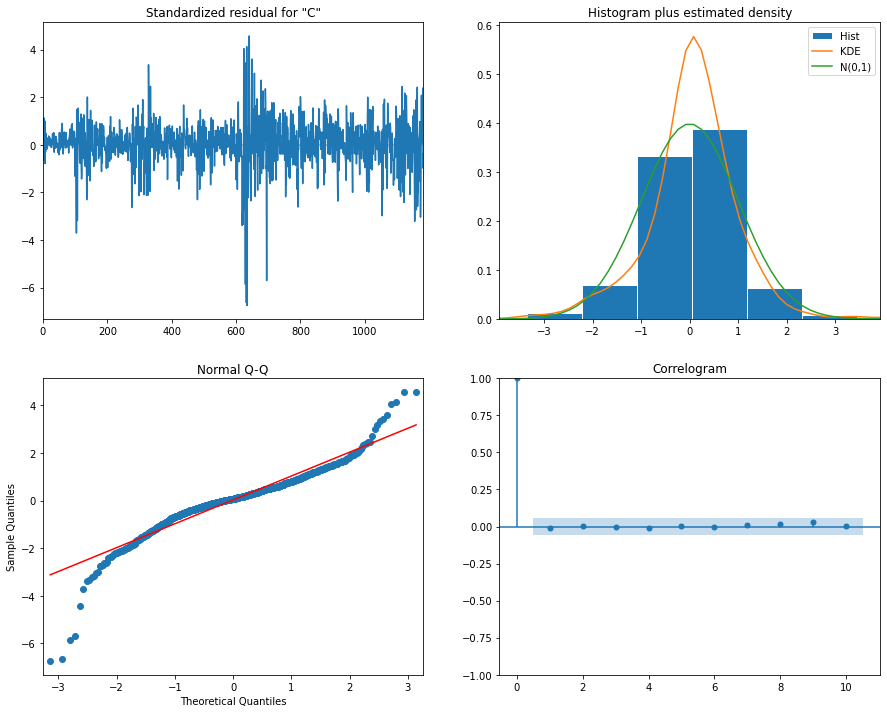

In [55]:
# Build ARIMA model
arima = ARIMA(endog_df_train.Close, order=(2,1,6))
arima_fit=arima.fit()
print(arima_fit.summary())
arima_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

In [56]:
# Predict stock price using time rolling technique
history = [x for x in endog_df_train.Close]
predictions1 = list()
for t in endog_df_test.index:
    model = ARIMA(history, order=(2,1,6))
    model_fit = model.fit()
    output = model_fit.forecast(dynamic=True)
    yhat = output[0]
    predictions1.append(yhat)
    obs = endog_df_test.Close[t]
    history.append(obs)

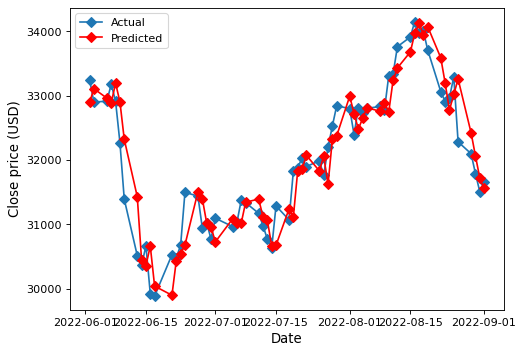

In [57]:
# Show results of prediction for the test data
from matplotlib.pyplot import figure
figure(figsize=(7, 5), dpi=80)

plt.plot(endog_df_test.index, endog_df_test.Close, label = 'Actual', marker='D')
plt.plot(endog_df_test.index, predictions1, label = 'Predicted', color='red', marker='D')
plt.ylabel('Close price (USD)', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.legend(loc='best')
plt.show() 

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1184
Model:                 ARIMA(2, 1, 6)   Log Likelihood               -8527.100
Date:                Mon, 28 Nov 2022   AIC                          17124.201
Time:                        00:14:42   BIC                          17301.854
Sample:                             0   HQIC                         17191.168
                               - 1184                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
comments_0     20.7049     24.642      0.840      0.401     -27.592      69.002
comments_1     -8.6042     30.020     -0.287      0.774     -67.442      50.234
comments_11  -179.3392     71.871     -2.495    

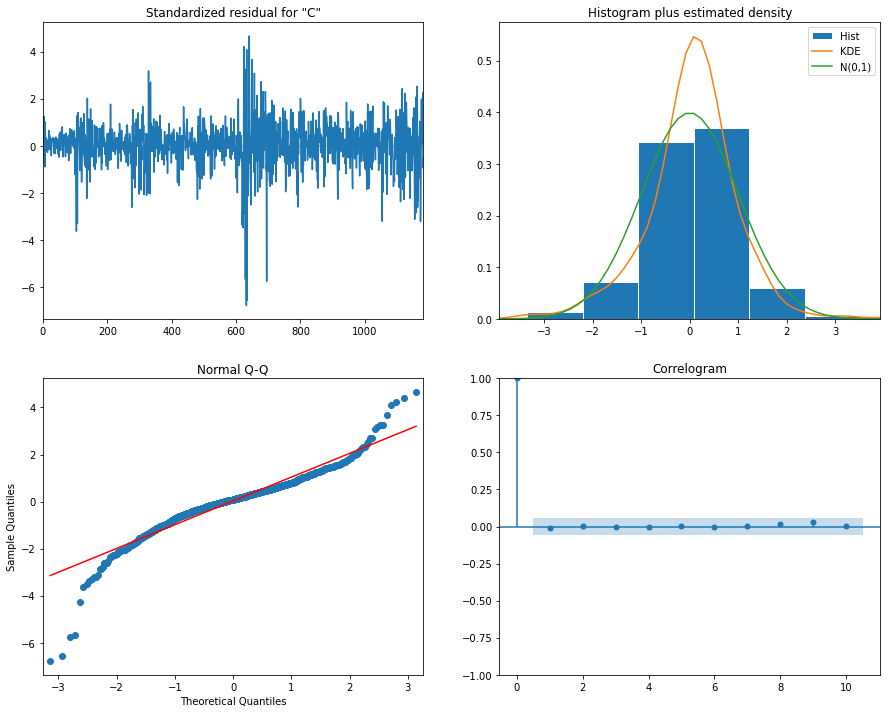

In [58]:
# Build ARIMAX model that have all attributes from topic modeling
arimax = ARIMA(endog = endog_df_train.Close, exog = exval_df_train, order=(2,1,6))
arimax_fit=arimax.fit()
print(arimax_fit.summary())
arimax_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

In [59]:
# Predict stock price using time rolling technique
history1 = endog_df_train
history2 = exval_df_train
predictions2 = list()
for t in endog_df_test.index:
    model = ARIMA(endog = history1, exog = history2, order=(2,1,6))
    model_fit = model.fit()
    output = model_fit.forecast(steps= 1, exog = exval_df_test[t:t],dynamic=False)
    output = output.to_frame()
    yhat = output.iloc[0,0]
    predictions2.append(yhat)
    obs1 = endog_df_test[t:t]
    history1 = history1.append(obs1)
    obs2 = exval_df_test[t:t]
    history2 = history2.append(obs2)

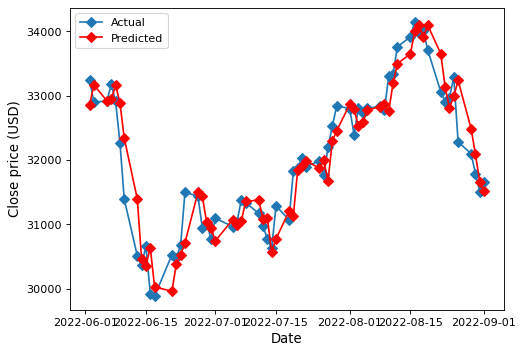

In [60]:
# Show results of prediction for the test data
figure(figsize=(7, 5), dpi=80)

plt.plot(endog_df_test.index, endog_df_test.values, label = 'Actual', marker='D')
plt.plot(endog_df_test.index, predictions2, label = 'Predicted', color='red', marker='D')
plt.ylabel('Close price (USD)', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.legend(loc='best')
plt.show()

In [61]:
# Pick up top two features
exval_df_train_reduced = exval_df_train[["comments_11","count_2"]]
exval_df_test_reduced = exval_df_test[["comments_11","count_2"]]

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1184
Model:                 ARIMA(2, 1, 6)   Log Likelihood               -8533.328
Date:                Mon, 28 Nov 2022   AIC                          17088.655
Time:                        00:20:07   BIC                          17144.489
Sample:                             0   HQIC                         17109.702
                               - 1184                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
comments_11  -146.3514     61.695     -2.372      0.018    -267.271     -25.432
count_2        34.6252     17.907      1.934      0.053      -0.472      69.723
ar.L1          -1.5704      0.040    -38.963    

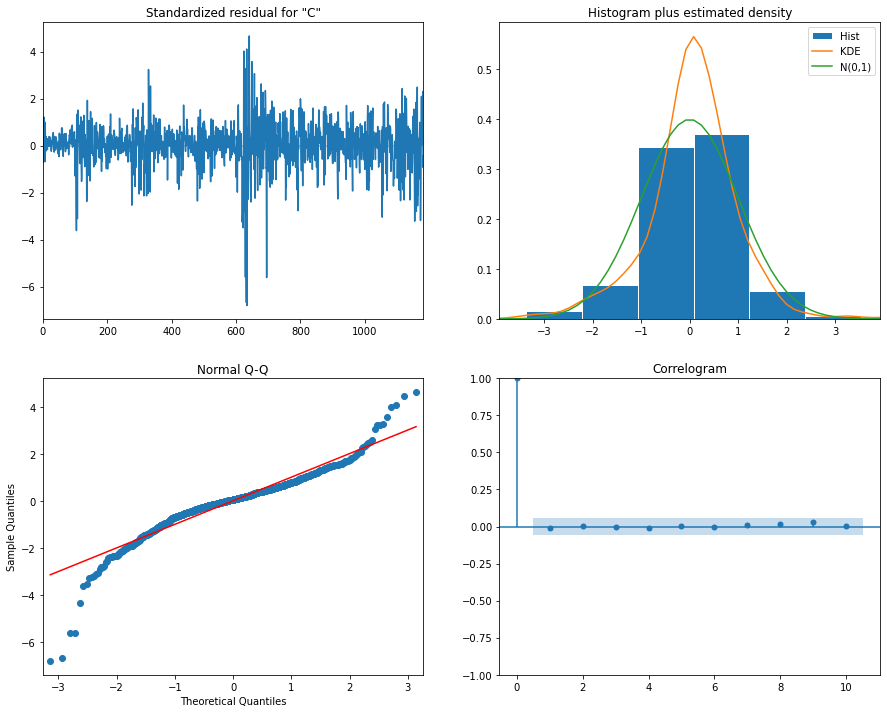

In [62]:
# Build ARIMAX model that have top 2 features
arimax1 = ARIMA(endog = endog_df_train.Close, exog = exval_df_train_reduced, order=(2,1,6))
arimax1_fit=arimax1.fit()
print(arimax1_fit.summary())
arimax1_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

In [63]:
# Predict stock price using time rolling technique
history1 = endog_df_train
history2 = exval_df_train_reduced
predictions3 = list()
for t in endog_df_test.index:
    model = ARIMA(endog = history1, exog = history2, order=(2,1,6))
    model_fit = model.fit()
    output = model_fit.forecast(steps= 1, exog = exval_df_test_reduced[t:t],dynamic=False)
    output = output.to_frame()
    yhat = output.iloc[0,0]
    predictions3.append(yhat)
    obs1 = endog_df_test[t:t]
    history1 = history1.append(obs1)
    obs2 = exval_df_test_reduced[t:t]
    history2 = history2.append(obs2)

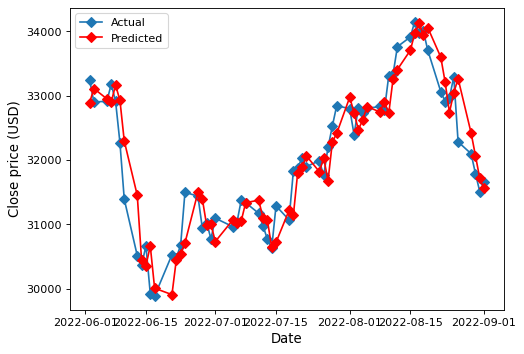

In [64]:
# Show results of prediction for the test data
from matplotlib.pyplot import figure
figure(figsize=(7, 5), dpi=80)

plt.plot(endog_df_test.index, endog_df_test.values, label = 'Actual', marker='D')
plt.plot(endog_df_test.index, predictions3, label = 'Predicted', color='red', marker='D')
plt.ylabel('Close price (USD)', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.legend(loc='best')
plt.show()

In [65]:
# Store result of predictions to the data frame
forecast1 = arima_fit.get_prediction(start= 10, dynamic=False)
pred1 = forecast1.conf_int()
pred1['mean']=forecast1.predicted_mean
pred1 = pred1.join(price_df_train)
pred1 = pred1.dropna()

forecast2 = arimax_fit.get_prediction(start= 10, dynamic=False)
pred2 = forecast2.conf_int()
pred2['mean']=forecast2.predicted_mean
pred2 = pred2.join(price_df_train)
pred2 = pred2.dropna()

forecast3 = arimax1_fit.get_prediction(start= 10, dynamic=False)
pred3 = forecast3.conf_int()
pred3['mean']=forecast3.predicted_mean
pred3 = pred3.join(price_df_train)
pred3 = pred3.dropna()

In [66]:
# Build Null model that predict based on the train data distribution 
endog_df_train['dif']= endog_df_train.Close.diff()
nulldist_df_train = endog_df_train.dropna()
mu = sum(nulldist_df_train['dif'])/len(nulldist_df_train['dif'])               
sig = math.sqrt(sum((nulldist_df_train['dif']-mu)**2)/len(nulldist_df_train['dif']))
np.random.seed(1001)
nulldist_df_train['predicted_dif'] = np.random.normal(mu, sig, len(nulldist_df_train['dif']))
nulldist_df_train['predicted_Close'] = 1.01
for i in range(0, len(nulldist_df_train['dif'])-1):
    nulldist_df_train['predicted_Close'][i+1] = nulldist_df_train['Close'][i]+nulldist_df_train['predicted_dif'][i+1]
nulldist_df_train = nulldist_df_train[1:]

In [67]:
# Evaluate models for the train data based on MSE and RMSE 
print('ARIMA model MSE_Train:{}'.format(mean_squared_error(pred1['Close'], pred1['mean'])))
print('ARIMA model MSE_Train:{}'.format(mean_squared_error(pred2['Close'], pred2['mean'])))
print('ARIMAX model top 2 features MSE_Train:{}'.format(mean_squared_error(pred3['Close'], pred3['mean'])))
print('Null model MSE_Test:{}'.format(mean_squared_error(nulldist_df_train['Close'], nulldist_df_train['predicted_Close'])))
print('ARIMA model RMSE_Train:{}'.format(math.sqrt(mean_squared_error(pred1['Close'], pred1['mean']))))
print('ARIMA model RMSE_Train:{}'.format(math.sqrt(mean_squared_error(pred2['Close'], pred2['mean']))))
print('ARIMAX model top 2 features RMSE_Train:{}'.format(math.sqrt(mean_squared_error(pred3['Close'], pred3['mean']))))
print('Null model RMSE_Test:{}'.format(math.sqrt(mean_squared_error(nulldist_df_train['Close'], nulldist_df_train['predicted_Close']))))

ARIMA model MSE_Train:108471.94617438105
ARIMA model MSE_Train:106999.35508415932
ARIMAX model top 2 features MSE_Train:108193.14845298507
Null model MSE_Test:228886.14979541887
ARIMA model RMSE_Train:329.350795011005
ARIMA model RMSE_Train:327.1075588918106
ARIMAX model top 2 features RMSE_Train:328.92726924501875
Null model RMSE_Test:478.4204738464052


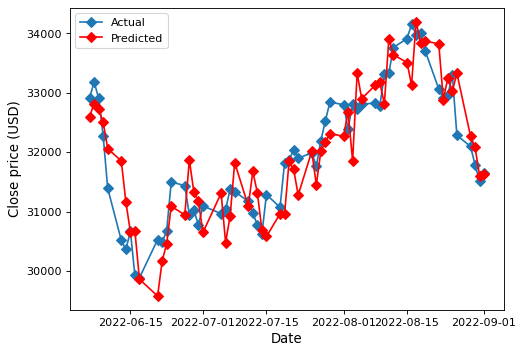

In [68]:
# Show results of Null model prediction for the test data
endog_df_test['dif']= endog_df_test.Close.diff()
nulldist_df_test = endog_df_test.dropna()
np.random.seed(1001)
nulldist_df_test['predicted_dif'] = np.random.normal(mu, sig, len(nulldist_df_test['dif']))
nulldist_df_test['predicted_Close'] = 1.01
for i in range(0, len(nulldist_df_test['dif'])-1):
    nulldist_df_test['predicted_Close'][i+1] = nulldist_df_test['Close'][i]+nulldist_df_test['predicted_dif'][i+1]
nulldist_df_test = nulldist_df_test[1:]
from matplotlib.pyplot import figure
figure(figsize=(7, 5), dpi=80)

plt.plot(nulldist_df_test.index, nulldist_df_test['Close'], label = 'Actual', marker='D')
plt.plot(nulldist_df_test.index, nulldist_df_test['predicted_Close'], label = 'Predicted',color='red', marker='D')
plt.ylabel('Close price (USD)', fontsize = 12)
plt.xlabel('Date', fontsize = 12)
plt.legend(loc='best')
plt.show()

In [69]:
# Evaluate models for the test data based on MSE and RMSE 
print('ARIMA model MSE_Test:{}'.format(mean_squared_error(endog_df_test.Close, predictions1)))
print('ARIMAX model MSE_Test:{}'.format(mean_squared_error(endog_df_test.Close, predictions2)))
print('ARIMAX model top 2 features MSE_Test:{}'.format(mean_squared_error(endog_df_test.Close, predictions3)))
print('Null model MSE_Test:{}'.format(mean_squared_error(nulldist_df_test['Close'], nulldist_df_test['predicted_Close'])))
print('ARIMA model RMSE_Test:{}'.format(math.sqrt(mean_squared_error(endog_df_test.Close, predictions1))))
print('ARIMAX model RMSE_Test:{}'.format(math.sqrt(mean_squared_error(endog_df_test.Close, predictions2))))
print('ARIMAX model top 2 features RMSE_Test:{}'.format(math.sqrt(mean_squared_error(endog_df_test.Close, predictions3))))
print('Null model RMSE_Test:{}'.format(math.sqrt(mean_squared_error(nulldist_df_test['Close'], nulldist_df_test['predicted_Close']))))

ARIMA model MSE_Test:143242.013509964
ARIMAX model MSE_Test:135341.32073455682
ARIMAX model top 2 features MSE_Test:139864.21370141552
Null model MSE_Test:261085.17414729024
ARIMA model RMSE_Test:378.47326657237494
ARIMAX model RMSE_Test:367.8876468904016
ARIMAX model top 2 features RMSE_Test:373.98424258438416
Null model RMSE_Test:510.96494414714033


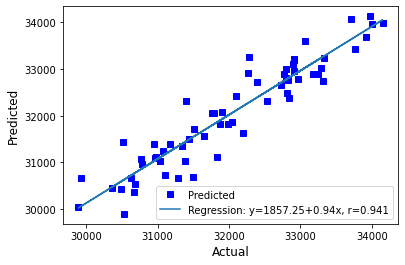

In [70]:
# Show a scatter plot and correlation coefficient of the ARIMA model
slope, intercept, r, p, stderr = scipy.stats.linregress(endog_df_test.Close, predictions1)
line = f'Regression: y={intercept:.2f}+{slope:.2f}x, r={r:.3f}'

plt.plot(endog_df_test.Close, predictions1, label = 'Predicted',color='blue', marker='s',linewidth=0)
plt.plot(endog_df_test.Close, intercept + slope *endog_df_test.Close,label=line)
plt.ylabel('Predicted', fontsize = 12)
plt.xlabel('Actual', fontsize = 12)
plt.legend(loc='best')
plt.show()

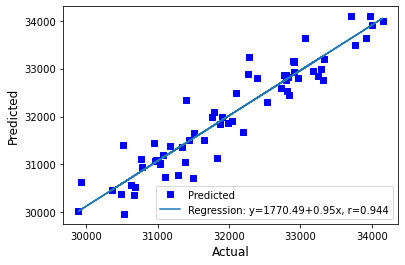

In [71]:
# Show a scatter plot and correlation coefficient of the ARIMAX model that have all features
slope, intercept, r, p, stderr = scipy.stats.linregress(endog_df_test.Close, predictions2)
line = f'Regression: y={intercept:.2f}+{slope:.2f}x, r={r:.3f}'

plt.plot(endog_df_test.Close, predictions2, label = 'Predicted',color='blue', marker='s',linewidth=0)
plt.plot(endog_df_test.Close, intercept + slope *endog_df_test.Close,label=line)
plt.ylabel('Predicted', fontsize = 12)
plt.xlabel('Actual', fontsize = 12)
plt.legend(loc='best')
plt.show()

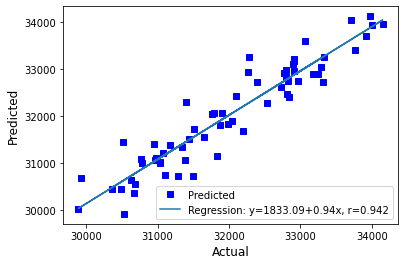

In [72]:
# Show a scatter plot and correlation coefficient of the ARIMAX model that have top two features
slope, intercept, r, p, stderr = scipy.stats.linregress(endog_df_test.Close, predictions3)
line = f'Regression: y={intercept:.2f}+{slope:.2f}x, r={r:.3f}'

plt.plot(endog_df_test.Close, predictions3, label = 'Predicted',color='blue', marker='s',linewidth=0)
plt.plot(endog_df_test.Close, intercept + slope *endog_df_test.Close,label=line)
plt.ylabel('Predicted', fontsize = 12)
plt.xlabel('Actual', fontsize = 12)
plt.legend(loc='best')
plt.show()

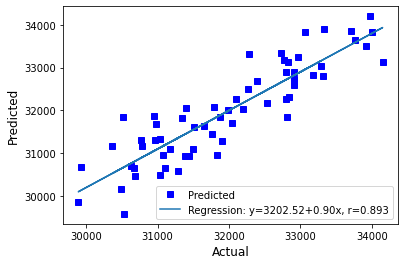

In [73]:
# Show a scatter plot and correlation coefficient of the Null model
slope, intercept, r, p, stderr = scipy.stats.linregress(nulldist_df_test['Close'], nulldist_df_test['predicted_Close'])
line = f'Regression: y={intercept:.2f}+{slope:.2f}x, r={r:.3f}'

plt.plot(nulldist_df_test['Close'], nulldist_df_test['predicted_Close'], label = 'Predicted',color='blue', marker='s',linewidth=0)
plt.plot(nulldist_df_test['Close'], intercept + slope *nulldist_df_test['Close'],label=line)
plt.ylabel('Predicted', fontsize = 12)
plt.xlabel('Actual', fontsize = 12)
plt.legend(loc='best')
plt.show()